#**EMAIL SPAM DETECTION WITH MACHINE LEARNING**

**We've all been the recipient of spam emails before.Spam mail or junk mail, is a type of email that is sent to a massive numbr of users at one time, Frequently containing cryptic messages,scams or most dangerously, phishing content.**

**In this project , use python to build an email spam detector to recognize and classify the emails into spam and non spam.**

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from nltk.stem import SnowballStemmer

In [61]:
df=pd.read_csv('/content/drive/MyDrive/COGNORISE/TASK 3 SPAM/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [62]:
df.shape

(5572, 2)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [64]:
df.dtypes

Category    object
Message     object
dtype: object

In [65]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [66]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

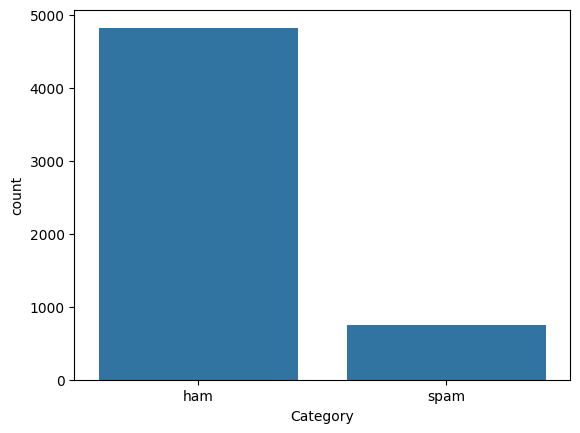

In [67]:
sns.countplot(x='Category',data=df)

In [68]:
df['Category']=df['Category'].map({'ham':0,'spam':1})
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [69]:
email=df.Message
email

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [70]:
#Remove special characters

email=email.str.replace('[a-zA-Z0-9]',"")
email

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [71]:
#Stemming

stemmer=SnowballStemmer('english')
from nltk import TweetTokenizer
tk=TweetTokenizer()

In [72]:
email=email.apply(lambda line:[stemmer.stem(token.lower()) for token in tk.tokenize(line)]).apply(lambda token:" ".join(token))
email


0       go until jurong point , crazi .. avail onli in...
1                           ok lar ... joke wif u oni ...
2       free entri in 2 a wkli comp to win fa cup fina...
3       u dun say so earli hor ... u c alreadi then sa...
4       nah i don't think he goe to usf , he live arou...
                              ...                        
5567    this is the 2nd time we have tri 2 contact u ....
5568                    will ü b go to esplanad fr home ?
5569    piti , * was in mood for that . so ... ani oth...
5570    the guy did some bitch but i act like i'd be i...
5571                            rofl . it true to it name
Name: Message, Length: 5572, dtype: object

In [73]:
#Remove stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
email=email.apply(lambda line:[token for token in tk.tokenize(line) if token not in sw]).apply(lambda token:" ".join(token))
email

0       go jurong point , crazi .. avail onli bugi n g...
1                           ok lar ... joke wif u oni ...
2       free entri 2 wkli comp win fa cup final tkts 2...
3             u dun say earli hor ... u c alreadi say ...
4                  nah think goe usf , live around though
                              ...                        
5567    2nd time tri 2 contact u . u £ 750 pound prize...
5568                            ü b go esplanad fr home ?
5569                    piti , * mood . ... ani suggest ?
5570    guy bitch act like i'd interest buy someth els...
5571                                     rofl . true name
Name: Message, Length: 5572, dtype: object

In [75]:
#TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
vect=vectorizer.fit_transform(email)
print(vect)

  (0, 6964)	0.19110492172724614
  (0, 1083)	0.34595353206857055
  (0, 3119)	0.16218433160442053
  (0, 1869)	0.2922629418853892
  (0, 1632)	0.3302500411191963
  (0, 3863)	0.2922629418853892
  (0, 7142)	0.2319166644424904
  (0, 3158)	0.1907512245283668
  (0, 1634)	0.2922629418853892
  (0, 4755)	0.16570762982943335
  (0, 1271)	0.26085595998664063
  (0, 2075)	0.2679171962304901
  (0, 5068)	0.23622438591929348
  (0, 3752)	0.34595353206857055
  (0, 3080)	0.1386783459162846
  (1, 4753)	0.5654383198044237
  (1, 7063)	0.44392038509714016
  (1, 3719)	0.4750857232302238
  (1, 3895)	0.4223798308516486
  (1, 4726)	0.28125261290253806
  (2, 378)	0.15111503670608792
  (2, 79)	0.23434695445324913
  (2, 1155)	0.1668292599267376
  (2, 5329)	0.1668292599267376
  (2, 6682)	0.12404862119091215
  :	:
  (5567, 4755)	0.17711222676164137
  (5568, 2617)	0.6650056778292512
  (5568, 2905)	0.5738678852280512
  (5568, 3369)	0.3744439687897732
  (5568, 3080)	0.29704345304299484
  (5569, 5019)	0.6038288697475673
  (5

In [76]:
vect.shape

(5572, 7297)

In [77]:
type(vect)

scipy.sparse._csr.csr_matrix

In [78]:
y=df['Category']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [79]:
X_train,X_test,y_train,y_test=train_test_split(vect,y,test_size=0.3,random_state=1)

In [80]:
X_train.shape,y_train.shape

((3900, 7297), (3900,))

In [81]:
X_test.shape,y_test.shape

((1672, 7297), (1672,))

**MODEL CREATION**

*KNEARESTNEIGHBORS CLASSIFIER*

In [82]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_kn=knn.predict(X_test)
y_pred_kn

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

accuracy score= 90.9090909090909
Classification Report               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1442
           1       1.00      0.34      0.51       230

    accuracy                           0.91      1672
   macro avg       0.95      0.67      0.73      1672
weighted avg       0.92      0.91      0.89      1672

CONFUSION MATRIX  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7cb4c403a950>


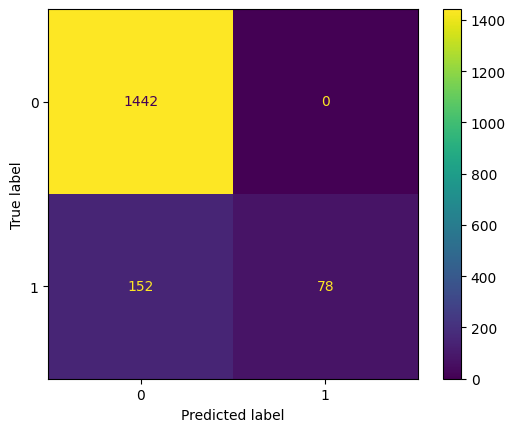

In [84]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
print("accuracy score=",accuracy_score(y_test,y_pred_kn)*100)

print('Classification Report',classification_report(y_test,y_pred_kn))
print("CONFUSION MATRIX ",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_kn))

*RANDOMFOREST CLASSIFIER*

In [85]:
rf=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200,
                       random_state=1)

In [86]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

Accuracy score: 86.30382775119617
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1442
           1       1.00      0.00      0.01       230

    accuracy                           0.86      1672
   macro avg       0.93      0.50      0.47      1672
weighted avg       0.88      0.86      0.80      1672

CONFUSION MATRIX  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7cb4c28a6050>


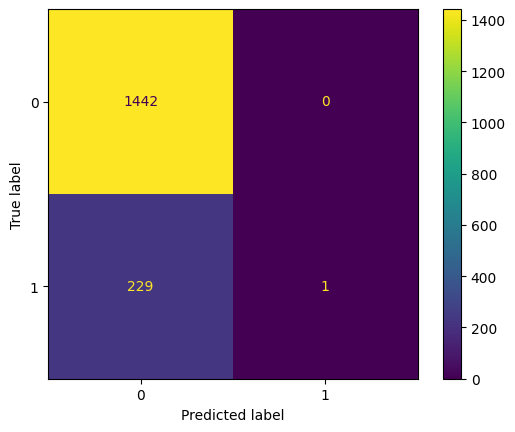

In [87]:
print('Accuracy score:',accuracy_score(y_test,y_pred_rf)*100)
print(classification_report(y_test,y_pred_rf))
print("CONFUSION MATRIX ",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))

*ADABOOST CLASSIFIER*

Accuracy score : 97.24880382775119
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1442
           1       0.94      0.85      0.89       230

    accuracy                           0.97      1672
   macro avg       0.96      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672

CONFUSION MATRIX  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7cb4c28abcd0>


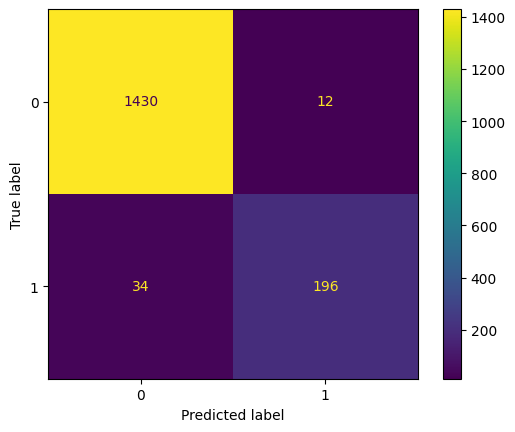

In [88]:
ad=AdaBoostClassifier(random_state=1)
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_ad)*100)
print(classification_report(y_test,y_pred_ad))
print("CONFUSION MATRIX ",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ad))

*LOGISTIC REGRESSION*

In [89]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [90]:
y_pred_lg=lg.predict(X_test)
y_pred_lg

array([0, 0, 0, ..., 0, 0, 0])

ACCURACY : 0.9527511961722488
CLASSIFICATION REPORT                precision    recall  f1-score   support

           0       0.95      1.00      0.97      1442
           1       0.96      0.69      0.80       230

    accuracy                           0.95      1672
   macro avg       0.95      0.84      0.89      1672
weighted avg       0.95      0.95      0.95      1672

CONFUSION MATRIX  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7cb4c3b8fa90>


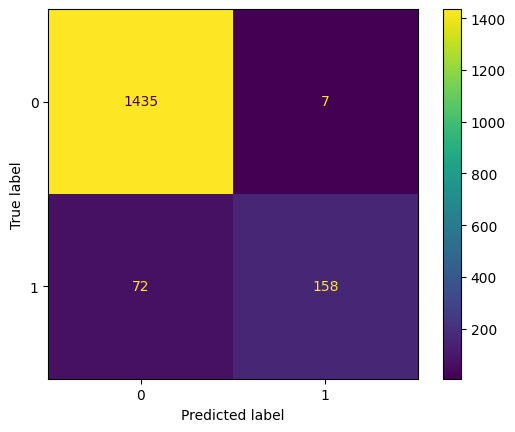

In [91]:
print("ACCURACY :",accuracy_score(y_test,y_pred_lg))
print("CLASSIFICATION REPORT ",classification_report(y_test,y_pred_lg))
print("CONFUSION MATRIX ",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lg))

**CONCLUSION**

*ADABOOST CLASSIFIER HAS HIGH ACCURACY.*

In [92]:
y_new=ad.predict(vectorizer.transform(['Rofl. Its true to its name']))
y_new

array([0])

In [93]:
y_new=ad.predict(vectorizer.transform(['Rofl. Its true to its name']))
if y_new.item()==-0:
  print("ham")

else:
  print("spam")

ham
